In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import patches
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import math
import neuro_morpho_toolbox as nmt
import pickle
path = './mesoscale_comparison/'


/Users/pengxie/Documents/Research/python/neuro_morhpo_toolbox/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.53
Loading CCF brain structure data...
Loading time: 0.01
Loading flat_map ...
Loading time: 3.13


In [2]:
def sum_regions(x, region='SSp'):
    for tag in ['-ipsi', '-contra']:
        tp_list = [nmt.bs.id_to_name(i)+tag for i in nmt.bs.get_all_child_id(region)]
        tp_list = [i for i in tp_list if i in (x.columns.tolist())]
        res = x[tp_list].sum(axis=1)
        x.drop(columns=tp_list, inplace=True)
        x[region+tag] = res
    return x

## Read mesoscale data

In [3]:
mesoscale_projection_volumes =pd.read_excel('/Users/pengxie/Documents/Research/Thalamus_fullMorpho/Data/Julie/single cell_meso groups_source match_thresholded meso_4 added.xlsx', 
                                          index_col=[0], sheet_name=2, skiprows=range(5))
# correct some column names
mesoscale_meta = mesoscale_projection_volumes.iloc[:,:7]
mesoscale_meta['reassigned primary-layer'] = ['-'.join(i.split('-')[:-1]) for i in mesoscale_meta['reassigned primary-layer'].tolist()]
mesoscale_projection_volumes = mesoscale_projection_volumes.iloc[:,7:]
mesoscale_projection_volumes = sum_regions(mesoscale_projection_volumes, 'SSp')

meso_list = [312240825,
             642811309, 
             479891303, 
             479670988,
             268163228,
             178489574, 
             180520257,
             168300739, 
             168301446, 
             267607635, 
             294356922, 
             272970747, 
             553747363, 
             558697990,
             183011353, 
             174781014, 
             292212456,
             183175010, 
             183282970,
             538834292,
             174736554, 
             306444486, 
             538834292
            ]

print([i for i in meso_list if not i in mesoscale_projection_volumes.index.tolist()])
meso_list = [i for i in meso_list if i in mesoscale_projection_volumes.index.tolist()]
meso_meta_selected = mesoscale_meta.loc[meso_list].copy()

mesoscale_meta.head()

[]


,mouse-strain,dataset-name,graph-order,primary-injection-structure,secondary-injection-structures,reassigned primary-layer,Sum PV (excl fiber tracts)
image-series-id,,,,,,,
168300739,Grik4-Cre,mca_classic,685,MD,LH,MD,3.227530
183011353,Grik4-Cre,mca_classic,669,PO,LP,PO,3.761952
268163228,Vipr2-Cre_KE2,mca_classic,689,SMT,VM|VPMpc|MD|RH|CM|PCN,SMT,3.429087
538834292,Calb1-T2A-dgCre,mca_classic,645,VM,VAL|LD|MD|SMT|PCN|CL|ZI,VM,4.630816
286299886,Cux2-IRES-Cre,mca_classic,6,FRP,MOs|ORBl,FRP,0.988535


## Read single cell data

In [4]:
[ns] = pickle.load(open('./neuron_set_1741cells.pickle', 'rb'))
meta_single = ns.metadata.copy()


In [5]:
singlecell_axon_matrix = ns.features['projection_features'].raw_data.copy()/1000
singlecell_axon_matrix.drop(columns=['ipsi_fiber tracts', 'contra_fiber tracts'], inplace=True)


old_col = singlecell_axon_matrix.columns.tolist()
new_col = []
for i in old_col:
    if 'ipsi' in i:
        i = i.replace('ipsi_', '')+'-ipsi'
    else:
        i = i.replace('contra_', '')+'-contra'
    new_col.append(i)
singlecell_axon_matrix.rename(columns=dict(zip(old_col, new_col)), inplace=True)
singlecell_axon_matrix = sum_regions(singlecell_axon_matrix, 'SSp')
singlecell_axon_matrix[singlecell_axon_matrix<1] = 1
singlecell_axon_matrix = np.log(singlecell_axon_matrix)
singlecell_axon_matrix.head()

,FRP-ipsi,MOp-ipsi,MOs-ipsi,SSs-ipsi,GU-ipsi,VISC-ipsi,AUDd-ipsi,AUDp-ipsi,AUDpo-ipsi,AUDv-ipsi,...,PRM-contra,COPY-contra,PFL-contra,FL-contra,FN-contra,IP-contra,DN-contra,VeCB-contra,SSp-ipsi,SSp-contra
17109_1701_x8048_y22277,1.132296,0.131935,2.611682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
17109_1801_x6698_y12550,1.399163,0.339511,3.434721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
17109_1901_x9602_y10508,0.964207,0.000000,0.049380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
17109_2201_x8046_y23301,0.067309,3.209202,2.877336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.102788,0.000000
17109_2301_x8535_y23051,0.000000,2.167141,2.539531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.137677


## Combine

In [6]:
rlist = ['VPM', 'VPL', 'VPMpc', 'VPLpc', 'LGd', 'MG', 'VAL', 'AM', 'SMT', 'MD', 'LP', 'PO', 'LD', 'VM', 'RE', 'CM']

cdict = {}
cdict['VPM'] = ['18457_00064', '17302_00112', '18454_01055', '18457_00056', '18465_00243', '18462_00015', '18465_00230','18454_01014',
 '18455_00015',
 '18455_00199',
 '18464_00074',
 '18454_00127',
                   '18455_00159',
         '18455_00154']
cdict['VPL'] = ['18455_00120',
 '18454_01033',
 '18457_00202',
 '18463_00034',
 '18454_00109',
                   '18463_00073',
         '18455_00152',
               '18463_00056',
                  '18465_00177',
                  '18457_00099',
                  '18465_00226',
                  '18458_00456',
                  '18464_00133',
                  '18457_00205']
cdict['LGd'] = [
 '17302_00048',
 '17302_00049',
 '17302_00066',
 '17545_00173',
 '18458_00051',
 '18458_00101',
 '18463_00001',
'18458_00239',
 '18462_00054',
 '18465_00056',
 '18465_00070',
 '18465_00109',
 '18465_00110',
 '18465_00117'
]
cdict['MG'] = ['18454_00063', '18454_00171', '18455_00050', '18458_00450',
       '18464_00194', '18454_00149',
                 '18462_00025',
                 '17302_00076',
                 '17302_00077',
                 '18454_00069',
                 '17545_00166',
                 '18454_00171',
              '18465_00145',
                   '18454_00063',
 '18455_00050',
 '18458_00450',
 '18463_00061',
 '18464_00080',
 '18465_00302']
cdict['MG'] = list(set(cdict['MG']))

In [7]:
for i in list(cdict.keys()):
    tp = cdict[i]
    exclude_list = [i for i in tp if not i in meta_single.index]
    tp = [i for i in tp if i in meta_single.index]
    tp = meta_single.loc[tp].copy()
    exclude_list = exclude_list + tp[tp['Manually_corrected_soma_region']!=i].index.tolist()
    print(i+':')
    print(exclude_list)

VPM:
[]
VPL:
[]
LGd:
[]
MG:
['18464_00194']


In [8]:
clist = []
ct_list = []
exp_list = []
reg_list = []
tp_dict = {}
for i,cgroup in enumerate(rlist[:]):
#     if cgroup in meso_matches['reassigned primary-layer'].tolist():
#         cmatches = meso_matches[meso_matches['reassigned primary-layer']==cgroup].copy()
#     else:
#         cmatches = matches[matches['reassigned primary-layer']==cgroup].copy()
#         print(cgroup, cmatches[cmatches['experiment-type']=='mesoscale']['image-series-id'].tolist())
#     mlist = cmatches[cmatches['experiment-type']=='mesoscale']['image-series-id'].tolist()
    
    # mlist
    if cgroup in meso_meta_selected['reassigned primary-layer'].tolist():
        mlist = meso_meta_selected[meso_meta_selected['reassigned primary-layer']==cgroup].index.tolist()
    else:
        mlist = mesoscale_meta[mesoscale_meta['reassigned primary-layer']==cgroup].index.tolist()
    # slist
    if cgroup in list(cdict.keys()):
        slist = cdict[cgroup]
    else:
        slist = meta_single[meta_single['Manually_corrected_soma_region']==cgroup].index.tolist()
#         slist = matches[matches['image-series-id'].isin(slist)]['image-series-id'].tolist()
#     print('%s:\t%d\t%d' % (cgroup, len(mlist), len(slist)))
    
    tp_dict[cgroup+'_meso'] = mlist
    tp_dict[cgroup+'_single'] = slist
    clist = clist + mlist
    clist = clist + slist
    n = len(mlist)+len(slist)
    ct_list = ct_list + [cgroup] * n
    exp_list = exp_list + (['meso']*len(mlist) + ['single']*len(slist))
    
#     # 1. select regions
#     mdf = mesoscale_projection_volumes.loc[mlist].copy()
#     mdf = np.log(mdf*100+1)
#     sdf = singlecell_axon_matrix.loc[slist].copy()
#     sdf = sdf / np.array(sdf.sum(axis=1)).reshape(-1,1)    
#     sdf = np.log(sdf*100+1)
         

In [9]:
s_reg_list = ['SSp-ipsi', 
              'SSs-ipsi', 
              'VISC-ipsi',
              'GU-ipsi',
              'VISp-ipsi', 
              'VISam-ipsi', 
              'VISpm-ipsi', 
              'VISa-ipsi', 
              'AUDp-ipsi', 
              'AUDv-ipsi', 
              'AUDd-ipsi', 
              'TEa-ipsi', 
              'MOp-ipsi', 
              'MOs-ipsi', 
              'ORBl-ipsi', 
              'ORBvl-ipsi', 
              'ORBm-ipsi', 
              'PL-ipsi',
              'AIv-ipsi', 
              'AId-ipsi', 
              'ACAd-ipsi',
              'ACAv-ipsi',
              'RSPagl-ipsi', 
              'RSPd-ipsi',
             ]


In [10]:
mdf = mesoscale_projection_volumes.copy()
mdf = np.log(mdf*100+1)
sdf = singlecell_axon_matrix.copy()
# sdf = sdf / np.array(sdf.sum(axis=1)).reshape(-1,1)    
# sdf = np.log(sdf*100+1)

res = pd.concat([mdf, sdf], axis=0)
res = res.loc[clist, s_reg_list]
res.shape

(202, 24)

## Heatmap

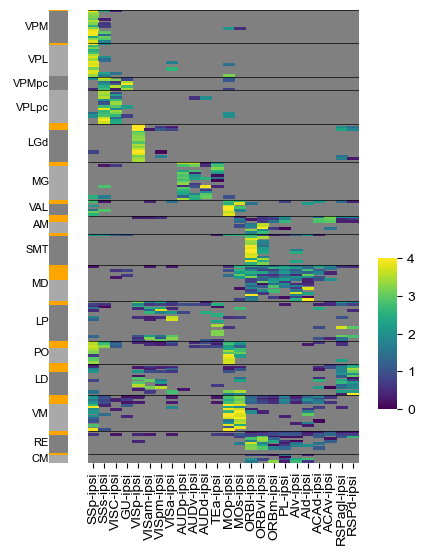

In [13]:
fig = plt.figure(1, figsize=(5,6), dpi=100)
grid = plt.GridSpec(len(res),20,wspace=0.0, hspace=0.0)

cy = 0
meso_colorbar = False
single_colorbar = False
cbar_size = int(len(res)/3)

meso_thres = 0.2
single_thres_mm = 1
single_thres = np.log(single_thres_mm)
# meso_max = 4
single_max = 4
meso_max = single_max

for i, cgroup in enumerate(rlist[:]):
    hsep = False
    # mesoscale
    ctag = cgroup+'_meso'
    cn = len(tp_dict[ctag])
    if cn>0:
        ax = fig.add_subplot(grid[cy:(cy+cn),4:18])
#         if not meso_colorbar:
#             cbar=True
#             bax = fig.add_subplot(grid[(int(len(res)/2)):(int(len(res)/2)+cbar_size),19:])
#             meso_colorbar = True
#         else:
#             cbar=False
        cbar = False
        ax.set_facecolor('grey')
        im=sns.heatmap(res.loc[tp_dict[ctag]],
                           cmap='viridis',
                           mask=(res.loc[tp_dict[ctag]]<=meso_thres),
                           yticklabels=0,
                           xticklabels=0,
                           ax=ax,
                       vmin=0,
                       vmax=meso_max,
                           cbar=False,
#                        cbar_ax=bax
                          )
        if not hsep:
            ax.hlines([0], *ax.get_xlim(), colors='k', lw=0.5)
            hsep = True
    cy = cy + cn
    
    # single cell
    ctag = cgroup+'_single'
    cn = len(tp_dict[ctag])
    if cn>0:
        ax = fig.add_subplot(grid[cy:(cy+cn),4:18])
        if not single_colorbar:
            cbar=True
            bax = fig.add_subplot(grid[(int(len(res)*0.55)):(int(len(res)*0.55)+cbar_size),19:])
            single_colorbar = True
        else:
            cbar=False
        ax.set_facecolor('grey')
        if cgroup == rlist[-1]:
            xticklabels = True
        else:
            xticklabels = False
        im=sns.heatmap(res.loc[tp_dict[ctag]],
                           cmap='viridis',
                           mask=(res.loc[tp_dict[ctag]]<=single_thres),
                           yticklabels=0,
                           xticklabels=xticklabels,
                           ax=ax,
                       vmin=0,
                       vmax=single_max,
                           cbar=cbar,
                       cbar_ax=bax
                          )
        if not hsep:
            ax.hlines([0], *ax.get_xlim(), colors='k', lw=0.5)
            hsep = True
    cy = cy + cn    



rax = fig.add_subplot(grid[:,:2])
h_0 = 1
h_unit = 1/len(res)
for i in rlist:
    n = ct_list.count(i)
    h_0 = h_0 - h_unit*n
    if n>0:
        rax.text(1,h_0+h_unit*n/2, i, fontdict={'size':8, 'ha':'right', 'va':'center'})
rax.axis('off')
# rax.hlines(1-np.array(sep_list)/len(res), xmin=0.9, xmax=1, colors='k', lw=0.5)
rax.set_xlim((0,1))
rax.set_ylim((0,1))

rax = fig.add_subplot(grid[:,2:3])
row_colors = pd.DataFrame({'Region':ct_list, 'Meso/Single':exp_list}, index=res.index)
lut = dict(zip(row_colors['Region'].unique(), [0, 1]*100))
row_colors['Region'] = row_colors['Region'].map(lut)
row_colors.loc[row_colors['Meso/Single']=='meso', 'Region'] = 3

# lut = dict(zip(row_colors['Meso/Single'].unique(), "rb"*100))
# row_colors['Meso/Single'] = row_colors['Meso/Single'].map(lut)

im=sns.heatmap(row_colors[['Region']],
                   cmap=['grey', 'darkgrey', 'orange'],
                   ax=rax,
                   yticklabels=0,
                   xticklabels=0,
#                row_colors=row_colors
                   cbar=False
                  )

fig.savefig('../Figure/TH_projection_matrix_thres'+str(single_thres_mm)+'.pdf', bbox_inches='tight')

In [14]:
meta_single['Manually_corrected_soma_region'].value_counts()['VPLpc']

15